In [1]:
import pandas as pd
import numpy as np

# Load player stats
df = pd.read_csv("../data/raw/player_stats.csv")

df.head()


,player_id,rank,agent,role,matches_played,win_rate,kills_per_match,deaths_per_match,assists_per_match,acs,headshot_pct,utility_usage,clutch_success_rate
0,P0001,Silver,Clove,Controller,367,0.529512,16.702813,13.294893,5.307003,182.779731,0.232486,0.526087,0.356563
1,P0002,Immortal,Iso,Duelist,363,0.550652,20.434803,12.060549,10.627069,239.841766,0.230088,0.355264,0.336361
2,P0003,Platinum,Phoenix,Duelist,210,0.501133,18.361020,13.314310,6.112292,241.372359,0.276981,0.290517,0.375524
3,P0004,Platinum,Brimstone,Controller,380,0.555864,20.521012,9.885579,5.088647,246.363649,0.207767,0.659313,0.266910
4,P0005,Bronze,Clove,Controller,65,0.421751,16.144393,16.518337,1.977407,164.089954,0.148720,0.516421,0.235664


In [2]:
# Select features for clustering
cluster_features = [
    "kills_per_match",
    "deaths_per_match",
    "assists_per_match",
    "acs",
    "headshot_pct",
    "utility_usage",
    "clutch_success_rate",
    "win_rate"
]

X = df[cluster_features]


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


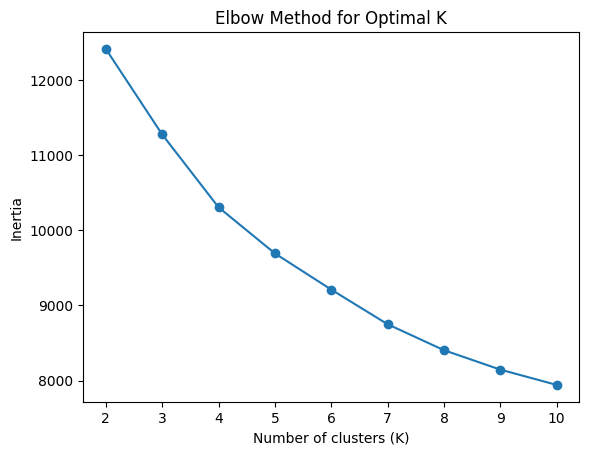

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [5]:
# Train K-Means with chosen K
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Assign cluster labels
df["playstyle_cluster"] = kmeans.fit_predict(X_scaled)


In [6]:
# Examine average stats per cluster
cluster_summary = (
    df
    .groupby("playstyle_cluster")[cluster_features]
    .mean()
    .round(2)
)

cluster_summary


,kills_per_match,deaths_per_match,assists_per_match,acs,headshot_pct,utility_usage,clutch_success_rate,win_rate
playstyle_cluster,,,,,,,,
0,22.70,11.37,7.27,256.42,0.22,0.50,0.28,0.56
1,13.28,15.70,4.13,168.51,0.23,0.51,0.28,0.44
2,17.83,13.12,5.64,203.96,0.26,0.34,0.21,0.50
3,18.11,13.00,5.71,204.53,0.21,0.58,0.32,0.50


In [7]:
# Map cluster numbers to playstyle names
playstyle_labels = {
    0: "Aggressive Fraggers",
    1: "Low-Impact / Learning Players",
    2: "Aim-Focused Duelists",
    3: "Utility & Clutch Specialists"
}

df["playstyle"] = df["playstyle_cluster"].map(playstyle_labels)


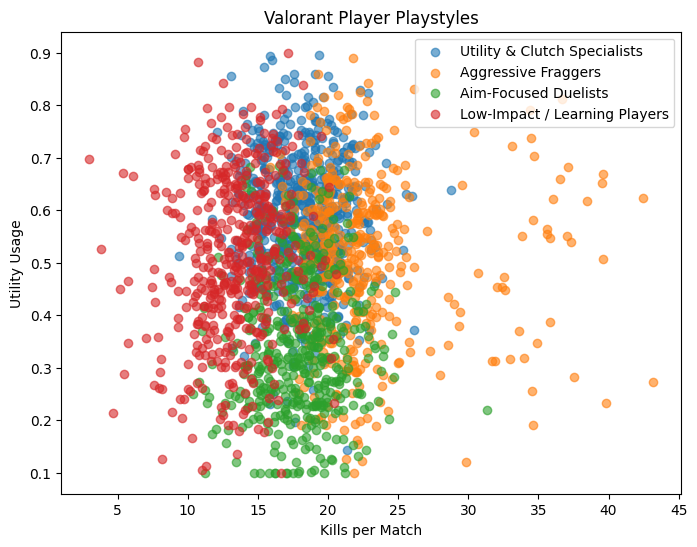

In [ ]:
# Visualising Playstyle
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for playstyle in df["playstyle"].unique():
    subset = df[df["playstyle"] == playstyle]
    plt.scatter(
        subset["kills_per_match"],
        subset["utility_usage"],
        label=playstyle,
        alpha=0.6
    )

plt.xlabel("Kills per Match")
plt.ylabel("Utility Usage")
plt.title("Valorant Player Playstyles")
plt.legend()
plt.show()


In [9]:
# Save clustered dataset
df.to_csv("../data/processed/player_stats_with_playstyles.csv", index=False)
